In [191]:
import pandas as pd
import matplotlib
import subprocess
import datetime
import numpy as np
import subprocess

# Task1

In [192]:
%matplotlib inline

In [193]:
def mydateparser(time_in_secs):    
    return datetime.datetime.fromtimestamp(float(time_in_secs))


def read_traffic(filename, fields=[], display_filter="", timeseries=False, strict=False):

    if timeseries:
        fields = ["frame.time_epoch"] + fields
    fieldspec = " ".join("-e %s" % f for f in fields)

    display_filters = fields if strict else []
    if display_filter:
        display_filters.append(display_filters)
    filterspec = "-Y '%s'" % " and ".join(f for f in display_filters)

    options = "-r %s -n -T fields -Eheader=y" % filename
    cmd = "tshark %s %s %s" % (options, filterspec, fieldspec)
    proc = subprocess.Popen(cmd, shell = True, 
                                 stdout=subprocess.PIPE)
    if timeseries:
        df = pd.read_table(proc.stdout, 
                        index_col = "frame.time_epoch", 
                        parse_dates=True, 
                        date_parser=mydateparser)
    else:
        df = pd.read_table(proc.stdout)
    return df

In [194]:
def process(ip):
    fields=["tcp.stream", "frame.time", "ip.src", "ip.dst", "tcp.len"]
    ts=read_traffic("traffic_dump.pcap", fields, timeseries=True, strict=True)
    chart = ts.groupby("tcp.stream").agg({
    "frame.time":[np.min, np.max],
    "tcp.len":np.sum,
    "ip.src":lambda x:x[0],
    "ip.dst":lambda x:x[0],
    })
    chart.columns=["ip.dst", "tcp.len", "starttime", "endtime", "ip.src"]
    chart = chart[(chart["ip.src"] == ip)|(chart["ip.dst"] == ip)]
    return chart

In [195]:
chart = process("192.168.1.64")
chart

,ip.dst,tcp.len,starttime,endtime,ip.src
tcp.stream,,,,,
0,74.125.19.83,0,"Jul 21, 2008 21:51:07.095278000 EDT","Jul 21, 2008 21:51:07.436746000 EDT",192.168.1.64
1,74.125.19.19,2565,"Jul 21, 2008 21:51:07.114897000 EDT","Jul 21, 2008 21:51:07.558553000 EDT",192.168.1.64
2,74.125.19.103,5158,"Jul 21, 2008 21:51:07.423663000 EDT","Jul 21, 2008 21:51:07.655556000 EDT",192.168.1.64
3,74.125.19.103,8266,"Jul 21, 2008 21:51:07.659558000 EDT","Jul 21, 2008 21:52:27.168965000 EDT",192.168.1.64
4,209.85.171.97,5017,"Jul 21, 2008 21:51:08.404617000 EDT","Jul 21, 2008 21:53:29.160668000 EDT",192.168.1.64
5,72.14.223.191,2521,"Jul 21, 2008 21:51:08.797425000 EDT","Jul 21, 2008 21:51:09.228901000 EDT",192.168.1.64
6,209.85.171.97,3067,"Jul 21, 2008 21:51:09.304315000 EDT","Jul 21, 2008 21:53:20.405529000 EDT",192.168.1.64
7,74.125.19.19,3369,"Jul 21, 2008 21:51:09.534025000 EDT","Jul 21, 2008 21:52:29.151718000 EDT",192.168.1.64
8,209.3.183.2,25630,"Jul 21, 2008 21:51:19.258123000 EDT","Jul 21, 2008 21:51:26.769411000 EDT",192.168.1.64


# Task2

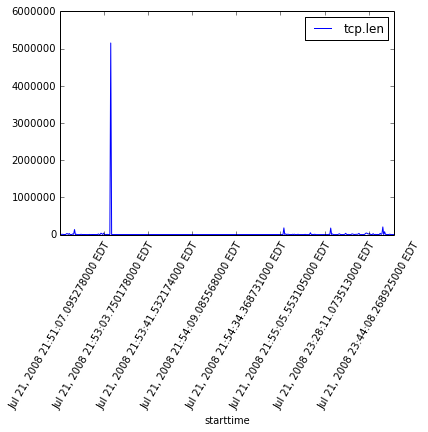

In [203]:
chart.sort_values('starttime', ascending=True).plot(x='starttime', y='tcp.len', rot=60)

# Task3

In [197]:
!tcpflow -r ./traffic_dump.pcap -o ./tcpflow_output   

In [198]:
!ls ./tcpflow_output/

004.071.104.187.00080-192.168.015.004.35950
004.078.212.029.00080-192.168.015.004.35458
004.078.212.029.00080-192.168.015.004.35712
008.012.217.125.00080-192.168.015.004.32822
008.012.217.125.00080-192.168.015.004.32824
008.012.217.125.00080-192.168.015.004.32828
008.012.217.125.00080-192.168.015.004.32830
008.012.221.123.00080-192.168.015.004.33298
012.129.147.065.00080-192.168.001.064.34023
012.129.147.065.00080-192.168.001.064.34526
012.129.147.065.00080-192.168.001.064.39442
012.129.147.065.00080-192.168.001.064.40031
012.129.147.065.00080-192.168.001.064.41835
012.129.147.065.00080-192.168.015.004.33318
012.129.147.065.00080-192.168.015.004.33320
012.129.147.065.00080-192.168.015.004.34480
012.129.147.065.00080-192.168.015.004.34482
012.129.147.065.00080-192.168.015.004.35082
012.129.147.065.00080-192.168.015.004.35084
012.129.210.041.00080-192.168.015.004.35644
012.129.210.041.00080-192.168.015.004.35652
012.129.210.046.00080-192.168.015.004.35944
012.129.210.046.00080-192.168.01


199.093.058.125.00080-192.168.015.004.32984
199.093.058.125.00080-192.168.015.004.32986
199.093.058.125.00080-192.168.015.004.32988
199.093.058.125.00080-192.168.015.004.32990
199.093.058.125.00080-192.168.015.004.32998
199.093.058.125.00080-192.168.015.004.33000
199.093.058.125.00080-192.168.015.004.33360
199.093.058.125.00080-192.168.015.004.35972
199.093.058.125.00080-192.168.015.004.35974
199.239.137.200.00080-192.168.001.064.37253
200.062.055.201.00080-192.168.015.004.35398
203.194.198.148.00080-192.168.015.004.36114
204.002.133.034.00080-192.168.015.004.33356
204.002.133.041.00080-192.168.015.004.35818
204.002.133.041.00080-192.168.015.004.35820
204.002.133.041.00080-192.168.015.004.36562
204.002.133.041.00080-192.168.015.004.36564
204.002.133.042.00080-192.168.015.004.33250
204.002.133.042.00080-192.168.015.004.33252
204.002.133.048.00080-192.168.015.004.35742
204.002.133.048.00080-192.168.015.004.35746
204.002.133.048.00080-192.168.015.004.35808
204.002.133.048.00080-192.168.0